# Project 1 -  EDA on Bigmart Sales Data

<a id = 'table-of-contents'></a>
# Contents

- [1 Introduction](#1)
    - [1.1 Problem Statement](#1.1)
    - [1.2 About Data](#1.2)
    - [1.3 Project Goal](#1.3)
- [2 Preparations](#2)
    - [2.1 Importing Packages](#2.1)
    - [2.2 Version Information](#2.2)
    - [2.3 Reading the dataset](#2.3)
- [3 Understanding the data](#3)
    - [3.1 Data and its shape](#3.1)
    - [3.2 Statistical Information](#3.2)
    - [3.3 Number of Unique Values in Each Column](#3.3)
- [4 Data Cleaning And Mising value Analysis](#4)
- [5 Data Visualization](#5)
- [6 Univariate Analysis](#6)
- [7 Multivariate Analysis](#7)

<a id='1'></a>
## Introduction


<a id='1.1'></a>
### Problem Statement

This is sales data of Big mart for more than 1500 products across 10 stores situated in various cities(different tier levels).

Data Source Link = https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement




<a id='1.2'></a>
### About Data
Item_Identifier - Item or product code. The same Products are available in multiple stores but the sales of that product for each store vary.

Item_Weight - Weight of the items

Item_Fat_Content - Describes the fat content in the item

Item_Visibility - The percent of the total display area of all products in a store allocated to the particular product

Item_Type - Category of the items, For example, if the item is meat, fruit, dairy etc.

Item_MRP - Price of the Items

Outlet_Identifier - Unique outlet code

Outlet_Establishment_Year - The year outlet was established

Outlet_Size - outlet size is categorical(Small, Medium, High)

Outlet_Location_Type - If the outlet is located at tier 1, tier 2 or tier 3 city.

Outlet_Type - If the outlet is a supermarket(with different types i.e nature and size) or a grocery store

Item_Outlet_Sales - Outlet sales of that product  

<a id='1.3'></a>
### Project Goal
Data cleaning - Identifying and handling null values, Remove duplicates, Fix structural errors.

Demonstrate the effect of attributes given in the dataset on the target variable(Item_Outlet_Sales)

Univariate Analysis and Bi-Variate Analysis

Statistical Analysis

Visualize the data


<a id='2'></a>
## Project Preparation

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>

<a id='2.1'></a>
### Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

<a id='2.2'></a>
### Version Information

In [2]:
from platform import python_version
print('The Python version is '+python_version())

# TO display pandas version
print('The Pandas version is '+pd.__version__)

# TO display numpy version
print('The Numpy version is '+np.__version__)

# TO display Seaborn version
print('The Seaborn version is '+sns.__version__)


# TO Matplotlib Seaborn version
print('The Matplotlib version is '+matplotlib.__version__)



The Python version is 3.9.12
The Pandas version is 1.4.2
The Numpy version is 1.21.5
The Seaborn version is 0.11.2
The Matplotlib version is 3.5.1


<a id='2.3'></a>
### Read the datasheet

In [5]:
data = pd.read_csv(r"C:\Users\Omkar Sangamnerkar\UMBC MPS DS\DATA 601 - John Wan\BigMartSalesData.csv")

<a id='3'></a>
# Understanding the data

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>


<a id='3.1'></a>
### Data shape and dataframe

In [6]:
data.shape

(8523, 12)

In [7]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

<a id='3.2'></a>
### Statistical Information

In [8]:
# To Describe the statistical information of the numerical values
data.describe().T

count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

<a id='3.3'></a>
### Number of Unique Values in each column of the dataset

In [9]:
# Identify the county of unqiue values in each column
pd.DataFrame(data.nunique(), columns=['No. of Unique Values']).sort_values(by = 'No. of Unique Values')

No. of Unique Values
Outlet_Size                                   3
Outlet_Location_Type                          3
Outlet_Type                                   4
Item_Fat_Content                              5
Outlet_Establishment_Year                     9
Outlet_Identifier                            10
Item_Type                                    16
Item_Weight                                 415
Item_Identifier                            1559
Item_Outlet_Sales                          3493
Item_MRP                                   5938
Item_Visibility                            7880

<a id='4'></a>
# Data Cleaning and Missing Value Analysis

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>

In [10]:
# Checking for the values in Item_Fat_Count Column
data['Item_Fat_Content'].value_counts() # .value_counts returns a Series containing counts of unique values.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# Creating a uniform value in the dataset. Eg: low fat and LF both mean Low Fat
data['Item_Fat_Content'].replace( {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)

In [12]:
data['Item_Fat_Content'].value_counts() # .value_counts returns a Series containing counts of unique values.

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [14]:
# Percentage of missing values in each column
data.isna().sum()/data.shape[0]*100 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Creating Dictionary : { 'Item_Identifier' : 'Item_Weight'(mode)}

weight_dict = data.groupby('Item_Identifier')['Item_Weight'].agg(pd.Series.mode).to_dict() # .agg(pf.series.mode) is used to calculate the mode

### Imputing "Item_Weight" by mode 'Item_Weight' value  for particular "Item_Identifier"

In [16]:
# Check for the Item_Wight column and check for the Null values and replace the null values with mode and replace the non integer values with the median of the column
data.loc[ data['Item_Weight'].isna(), 'Item_Weight'] = data[ data['Item_Weight'].isna()]['Item_Identifier'].apply(lambda x: weight_dict[x] if type(weight_dict[x]) == int else 12)

### Imputing "Outlet_Size"

In [17]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [18]:
# Check the count of different outlet sizes
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [19]:
# Identify the unqiue outlet identifiers or unqiue store id/code
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
# Check for the empty values in the outlet size column
data[ data['Outlet_Size'].isna()].groupby('Outlet_Identifier')['Outlet_Establishment_Year'].value_counts()

Outlet_Identifier  Outlet_Establishment_Year
OUT010             1998                         555
OUT017             2007                         926
OUT045             2002                         929
Name: Outlet_Establishment_Year, dtype: int64

In [21]:
# Identify the unqiue outlet location type
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [22]:
#Identify the unqiue outlet types
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [23]:
# Determine the outlet size for the outlet type grocery store 
data[ data['Outlet_Type'] == 'Grocery Store']['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

## Insights 

All the Grocery Stores have `Small` 'Outlet_Size'.

So we will impute missing values of 'Outlet_Size' as `Small` for rows which have 'Outlet_Type' as `Grocery Store`

In [24]:
# Replace the outlet size as small for empty values of outlet size where outlet type is grocery store
data.loc[ (data['Outlet_Size'].isna()) & (data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'

In [25]:
# Determine the remaining null values in the outlet size and retreive their outlet type
data[ data['Outlet_Size'].isna()]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Name: Outlet_Type, dtype: int64

In [26]:
data[ data['Outlet_Type'] == 'Supermarket Type1']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
6              FDO10       13.650          Regular         0.012741   
8              FDH17       16.200          Regular         0.016687   
...              ...          ...              ...              ...   
8517           FDF53       20.750          Regular         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
2                   Meat  141.6180            OUT049   
4              Household   53.8614            OUT013   
6            Snack Foods   57.6588            OUT013   
8           Frozen Foods   96.9726            OUT045   
...                  ...       ...               ...   
8517        Frozen Foods  178.8318            OUT046   
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
2                          1999      Medium               Tier 1   
4                          1987        High               Tier 3   
6                          1987        High               Tier 3   
8                          2002         NaN               Tier 2   
...                         ...         ...                  ...   
8517                       1997       Small               Tier 1   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
2     Supermarket Type1          2097.2700  
4     Supermarket Type1           994.7052  
6     Supermarket Type1           343.5528  
8     Supermarket Type1          1076.5986  
...                 ...                ...  
8517  Supermarket Type1          3608.6360  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8522  Supermarket Type1           765.6700  

[5577 rows x 12 columns]

In [27]:
# Determine the null values in the outlet size and retreive their outlet location type
data[ data['Outlet_Size'].isna()]['Outlet_Location_Type'].value_counts()

Tier 2    1855
Name: Outlet_Location_Type, dtype: int64

In [28]:
# When the outlet type is Super Market Type1 and Data Location Type is Tier 2, return the outlet size with the counts
data[(data['Outlet_Type'] == 'Supermarket Type1') & (data['Outlet_Location_Type'] == 'Tier 2')]['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

## Insights

All missing values of 'Outlet_Size' column have 'Outlet_Type' as 'Supermarket Type1'.
    
After grouping with 'Outlet_Type' = 'Supermarket Type1' & 'Outlet_Location_type' we can see that `Tier 2` have `Small` 'Outlet_Size'.

So, we will impute missing values of 'Outlet_Size' with the help of these observations.

In [29]:
# If the outlet size is null and the outlet location type is Tier 2 then insert outlet size as small
data.loc[ (data['Outlet_Size'].isna()) & (data['Outlet_Location_Type'] == 'Tier 2'), 'Outlet_Size'] = 'Small'

In [30]:
# We have eliminated all the empty values
data.isna().sum()/data.shape[0]*100 

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [31]:
# Out Target varliable is Item_Outlet_Sales and we are going to analyze data based on the effect of other variables on our target variable
target = 'Item_Outlet_Sales'

In [32]:
target

'Item_Outlet_Sales'

Text(0, 0.5, '')

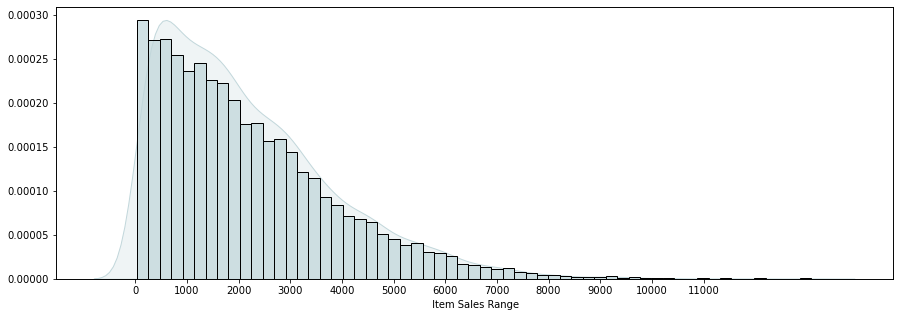

In [33]:
fig = plt.figure(figsize = (15, 5)) # Setting the figure size
gs = fig.add_gridspec(1, 1) # Adding the subplot 

background_color = "#faf9f4" # Setting the background color
color_palette = ["#8d9e8c", "#c2d7db"] # Setting the color palette


# Fig 1
ax0 = fig.add_subplot(gs[0, 0]) # Selecting the subplot

ax0.grid(color='gray', linestyle='', axis='y') # Setting the gridstyle
pl1 = sns.kdeplot(data[target], color='#c2d7db', shade = True, ax = ax0) # plotting the kdeplot
ax01 = ax0.twinx() # twinnig the subplot for overlapping the histplot
pl2 = sns.histplot(data[target], color='#c2d7db', ax = ax01) # Plotting the histplot 

ax0.set_xticks(range(0,12000,1000)) # Modifying the xtick's range
ax01.set_yticks([]) # Setting y ticks as none
ax0.set_xlabel(" Item Sales Range") # Setting the X label
ax0.set_ylabel("") # Removing labels
ax01.set_ylabel("") # Removing labels



<a id='5'></a>
# Data Visualization

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>

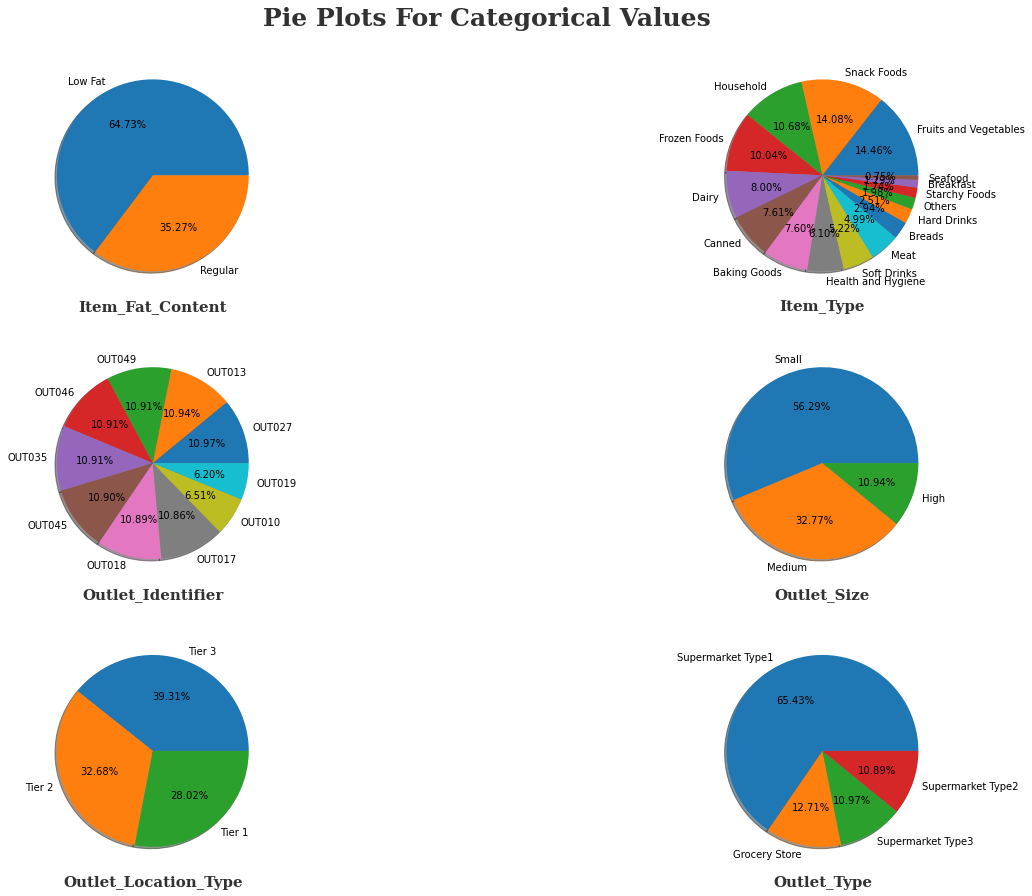

In [34]:
fig = plt.figure(figsize = (22, 15))# Setting the figure size
gs = fig.add_gridspec(3, 2) # Adding the subplots in the figure

ax0 = fig.add_subplot(gs[0, 0]) # Storing the subplots in variables
ax1 = fig.add_subplot(gs[0, 1]) # Storing the subplots in variables
ax2 = fig.add_subplot(gs[1, 0]) # Storing the subplots in variables
ax3 = fig.add_subplot(gs[1, 1]) # Storing the subplots in variables
ax4 = fig.add_subplot(gs[2, 0]) # Storing the subplots in variables
ax5 = fig.add_subplot(gs[2, 1]) # Storing the subplots in variables

columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'] # Columns for visualization
subplot_list = [ax0, ax1, ax2, ax3, ax4, ax5] # List of subplots
explode = (0.1, 0.0, 0.1, 0.1, 0.1, 0.0) # Ratios for explode

for col, pos in zip(columns, subplot_list): # Iterating through columns and particular subplot
    data[col].value_counts().plot.pie(autopct = '%1.2f%%', ax = pos, shadow = True) # Plotting the pie plots
    pos.set_xlabel(f'{col}', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232") # Setting the xlabel 
    pos.set_ylabel("") # Setting the ylabel

_ = plt.title('Pie Plots For Categorical Values',fontsize=25, y = 3.5, x = -0.9, fontweight='bold', fontfamily='serif', color="#323232") # Setting the title

In [35]:
columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']

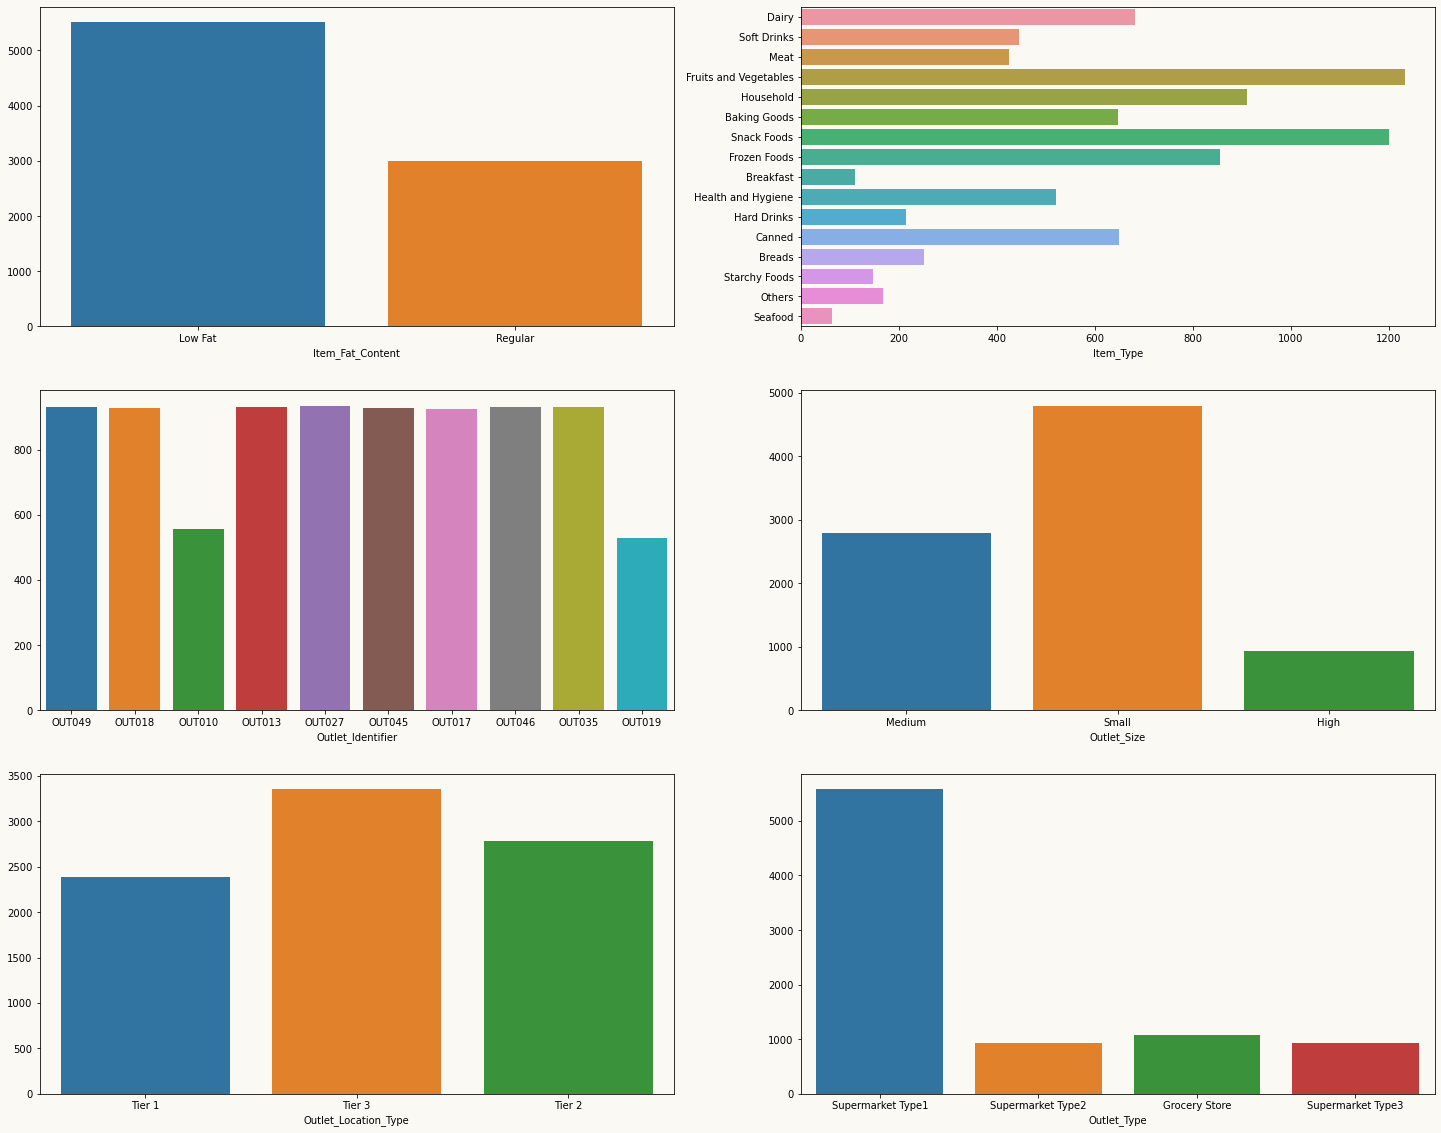

In [36]:
fig, axes = plt.subplots(3, 2, figsize = (25, 20))
fig.patch.set_facecolor(background_color)

axx = axes.flatten() # Creating the list of the subplot


for ind, val in enumerate(columns):
    if val == 'Item_Type': # For the graph of Item type I have rotated the graph as the text of the entities in the column were colliding 
        plot = axx[ind] # Selecting the subplot
        plot.set_facecolor(background_color) #Setting the background color
        sns.countplot(data = data, y = val, ax = plot) # Plotting the countplot
        plot.set_xlabel(val)  # Setting labels
        plot.set_ylabel("")  # Setting labels
        continue
    plot = axx[ind] # Selecting the subplot
    plot.set_facecolor(background_color) #Setting the background color
    sns.countplot(data = data, x = val, ax = plot) # Plotting the countplot
    plot.set_xlabel(val) # Setting labels
    plot.set_ylabel("") # Setting labels

<a id='6'></a>
# Univariate Analysis

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>

In [37]:
col_cat = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']

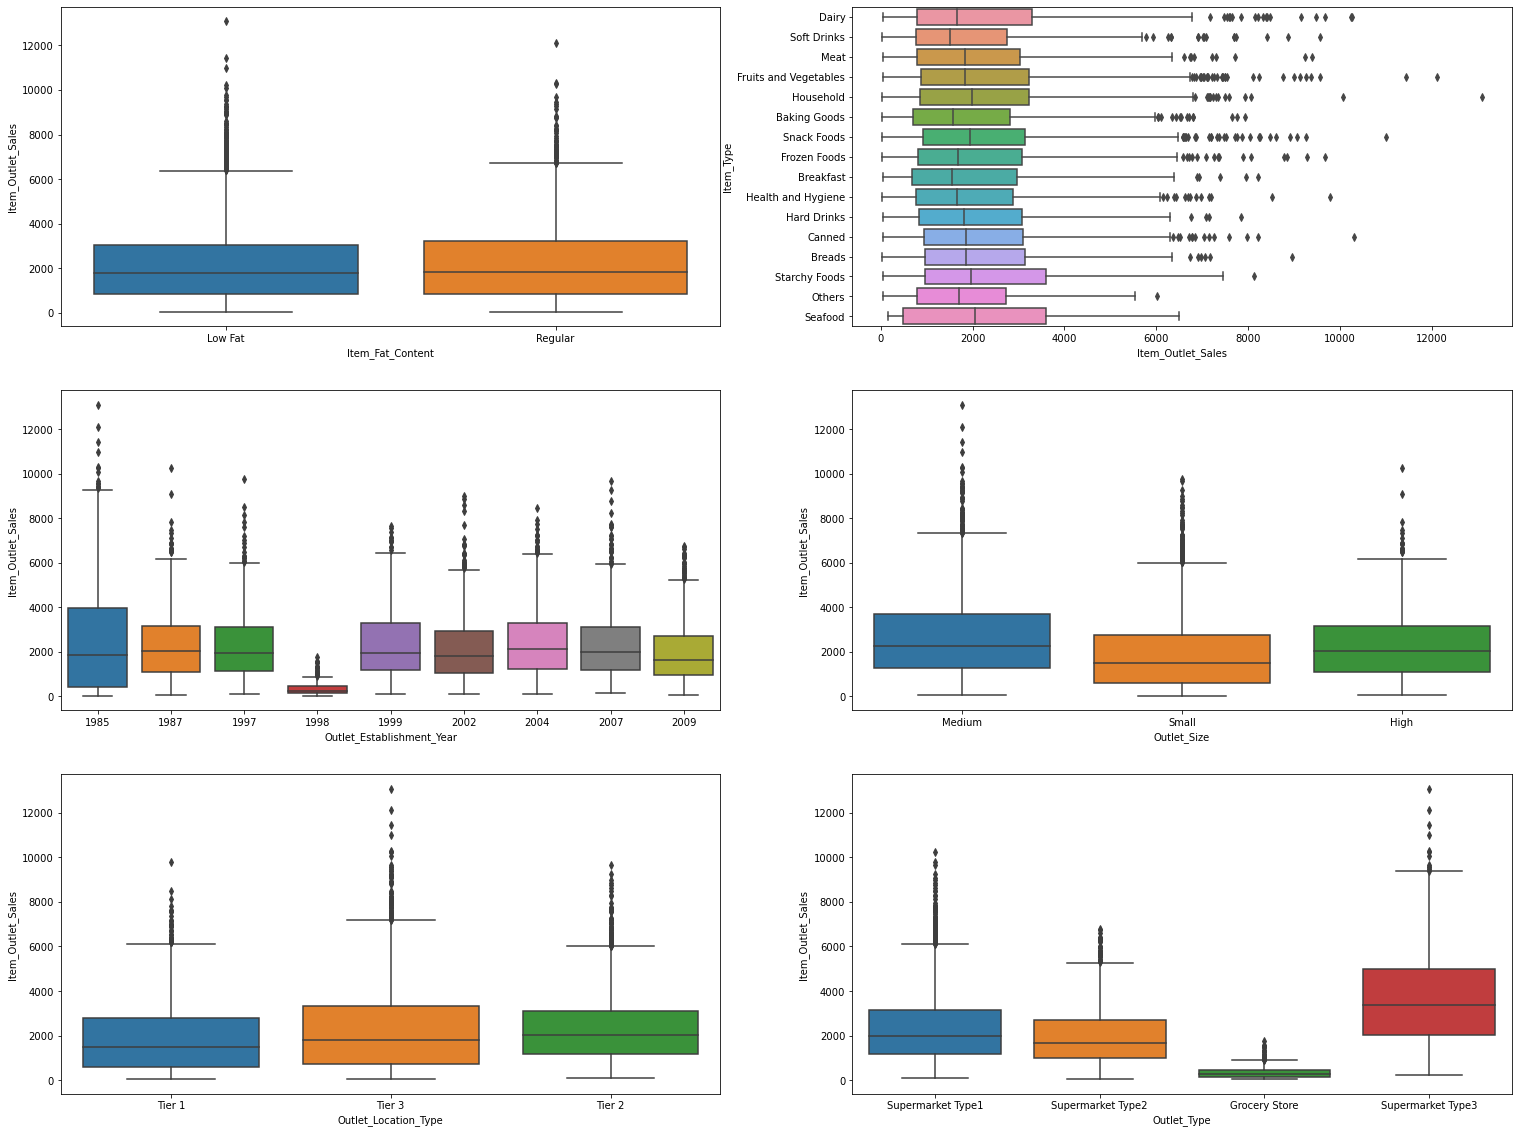

In [38]:
f, ax = plt.subplots(nrows = 3, ncols=2,figsize = (26,20)) # Creating the subplots
axx = ax.flatten() # Creating the list of subplots


for pos,col in enumerate(col_cat): # terating through the columns
    if col == 'Item_Type':
        sns.boxplot(x = data['Item_Outlet_Sales'],y = data[col],ax = axx[pos]) # plotting the boxplot on respective subplot
        continue
    sns.boxplot(y = data['Item_Outlet_Sales'],x = data[col],ax = axx[pos]) # plotting the boxplot on respective subplot

## Insights
By Observing the box plot we can say following things regarding the data.
1. Low fat items are sold less compared to the regular
2. Seafood is one of the highest sold product type
3. Outlet established in year 1985 have the highest sales while the outlet established in 1998 have least sales.
4. The outlet size does not play a significat role in the sales value but the small outlets have more sales compared to other.
5. Tier3 store locations have the highest sale while tier two have the lowest
6. Grocery stores have the least sale and the Supermarket Type 3 have the highest sale

The is noisy and has outliers

<a id='7'></a>
# Multivariate Analysis

[back to contents](#table-of-contents)
<a id="table-of-contents"></a>

In [39]:
col_cat =['Item_Fat_Content',
 'Item_Type',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [40]:
col_num = ['Item_Weight', 'Item_Visibility','Item_MRP'] # Selecting the columns for visualization

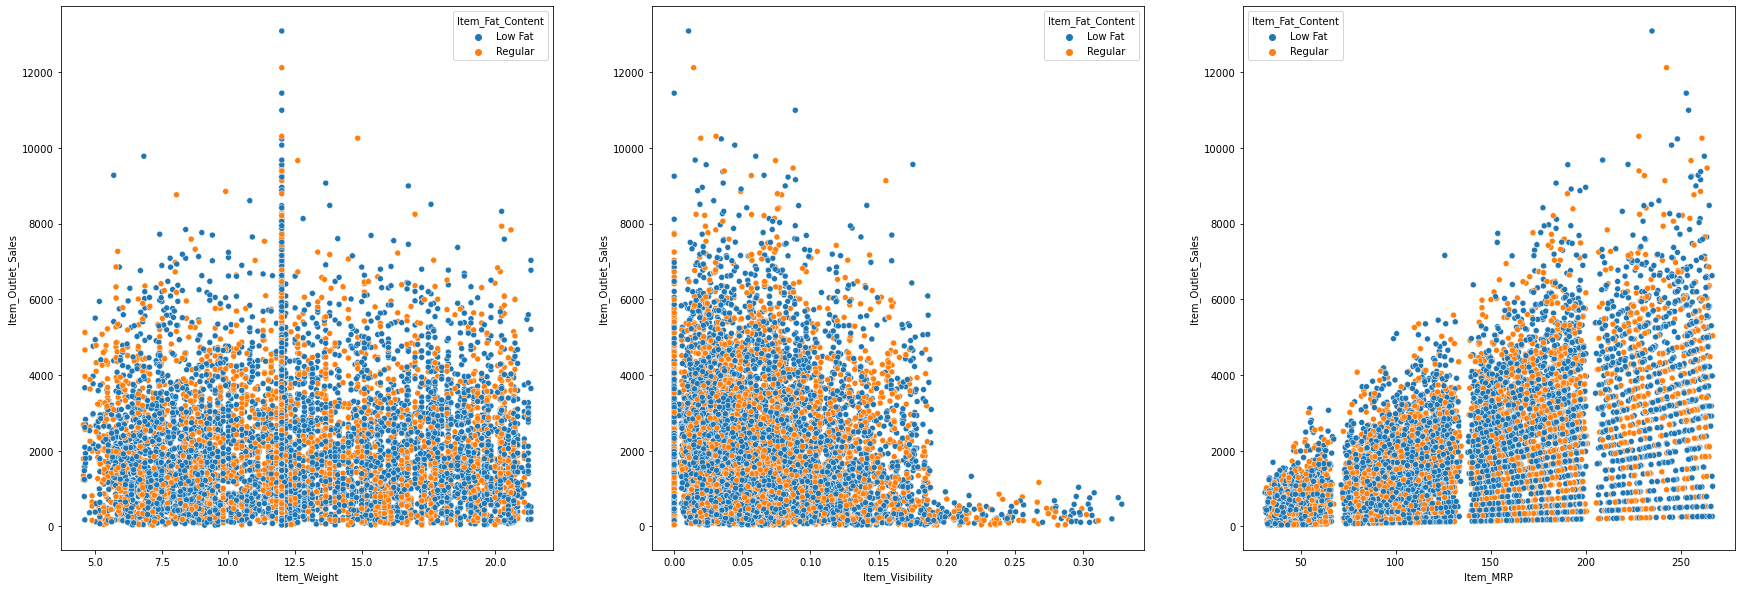

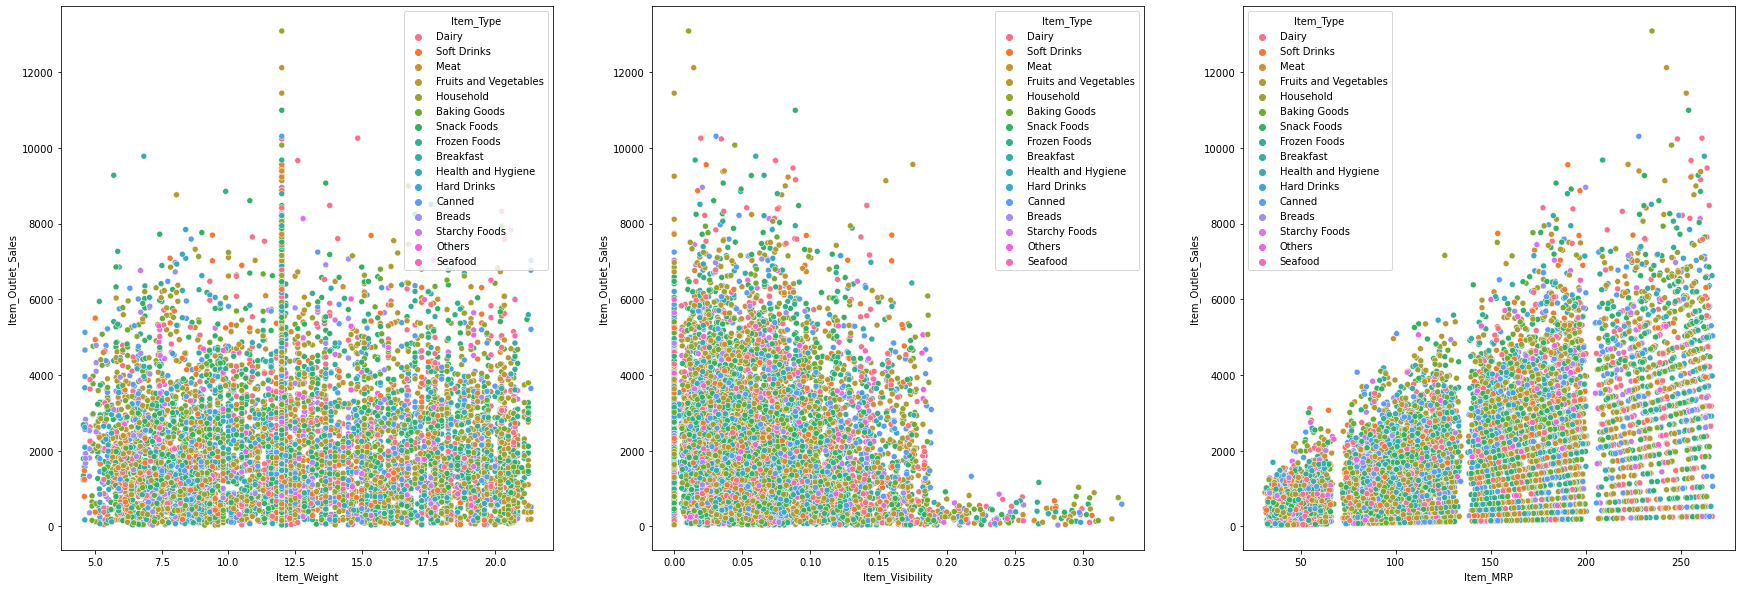

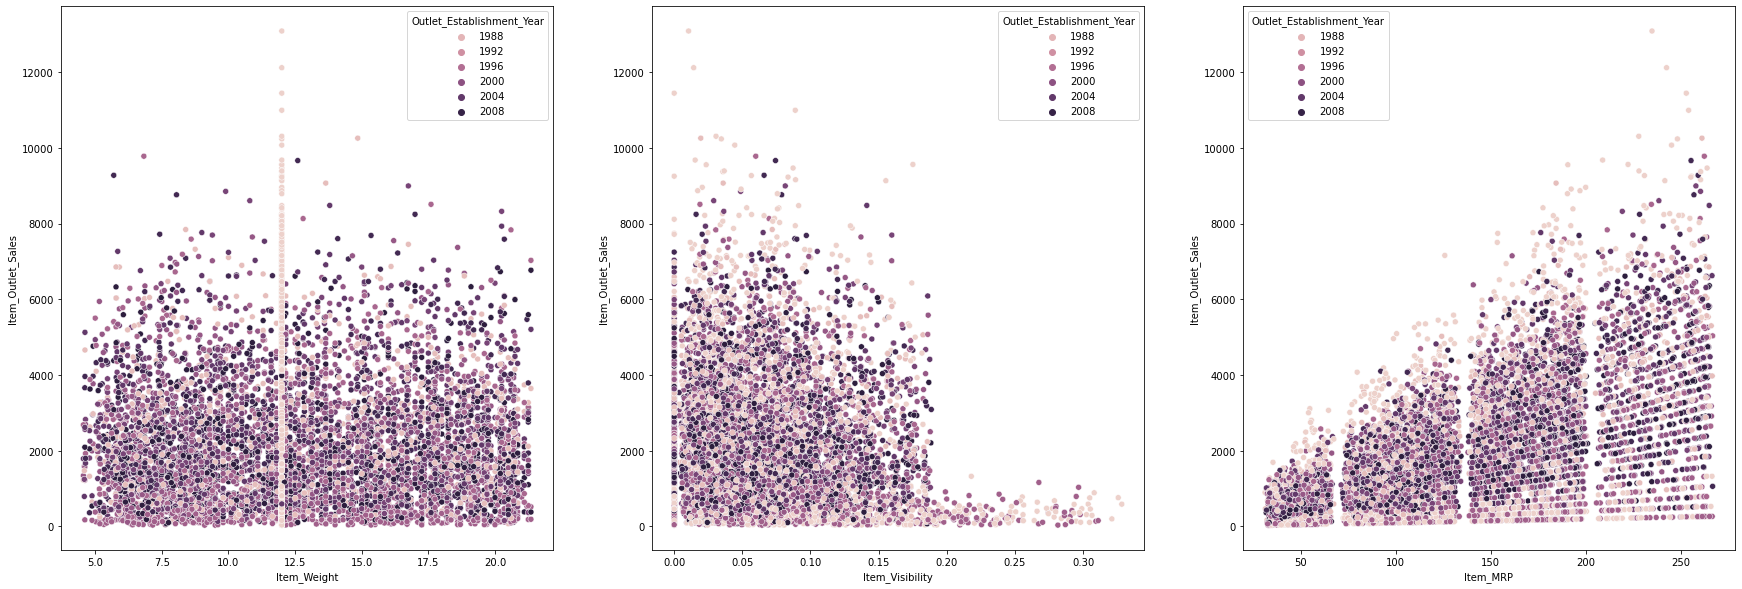

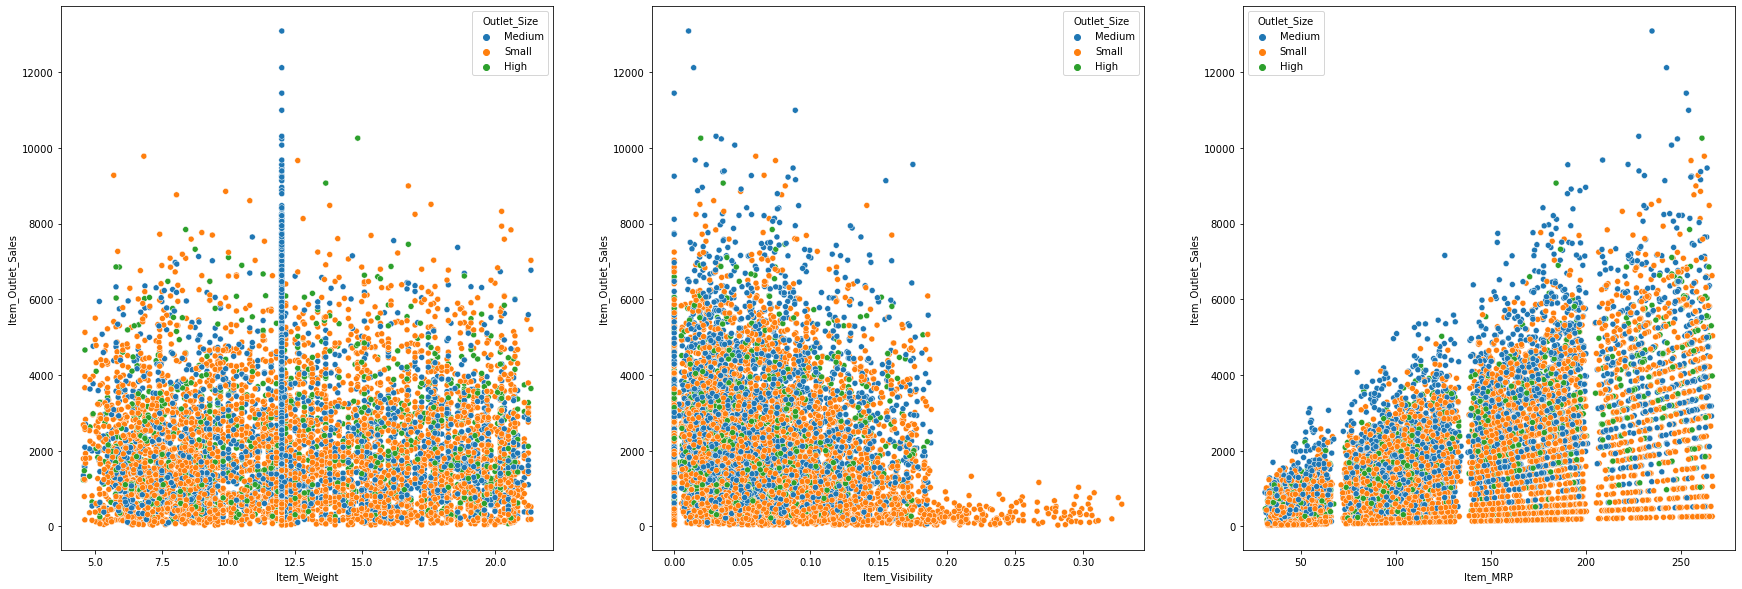

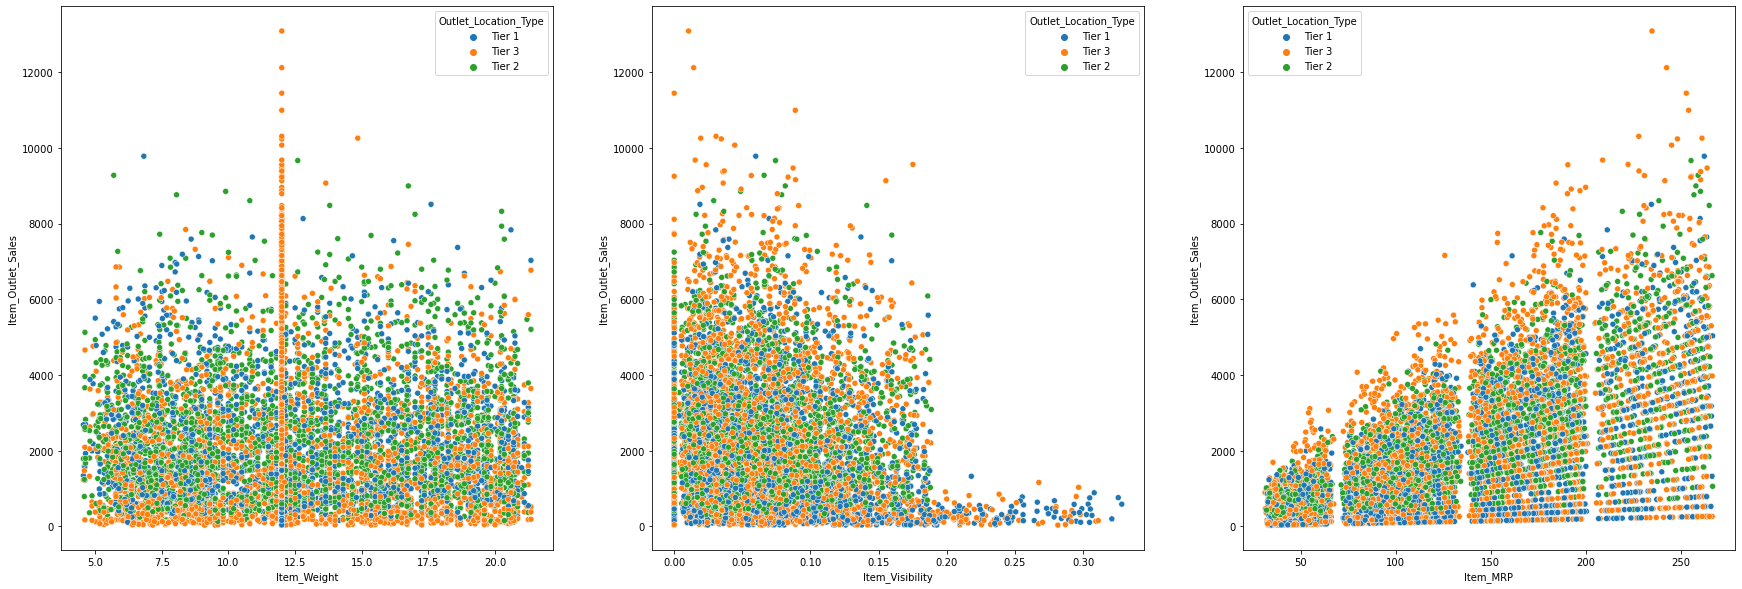

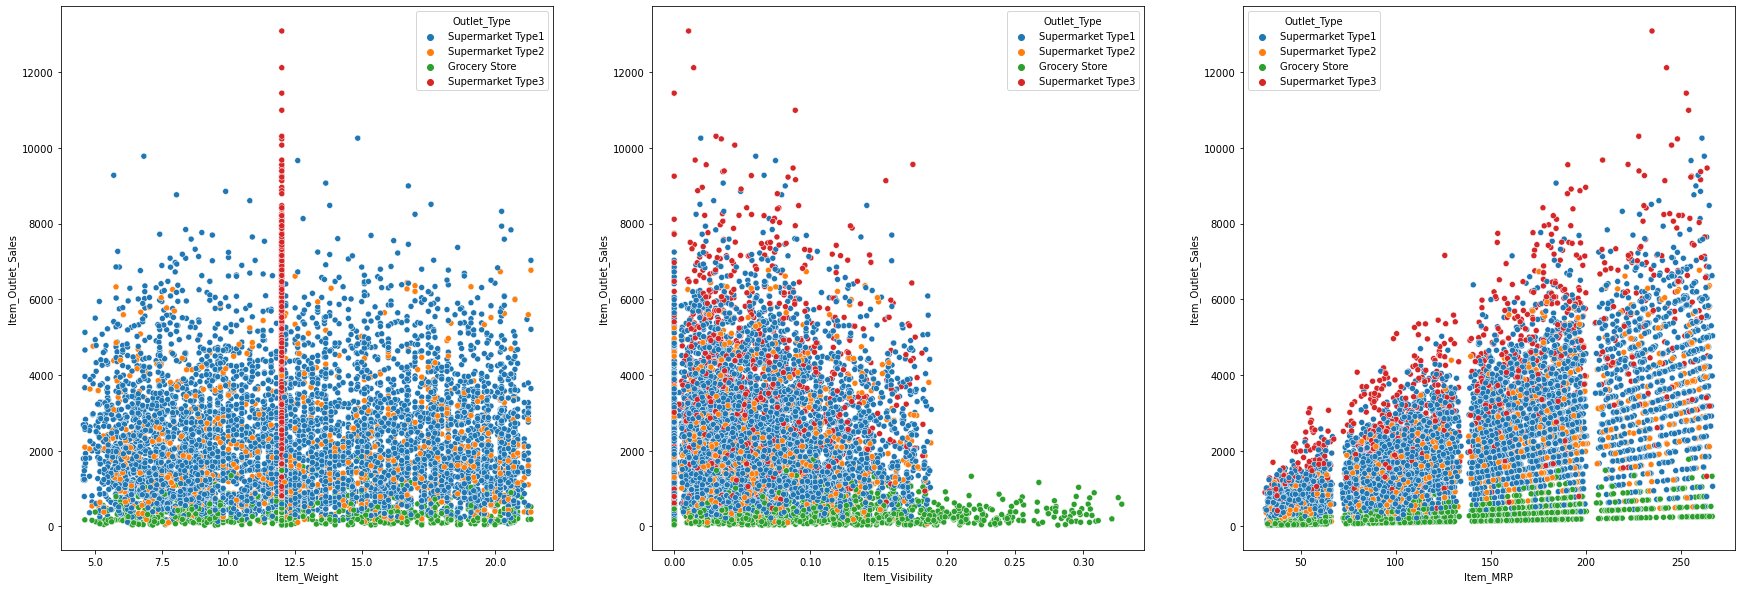

In [41]:
for cat in col_cat: # Iterating through the columns
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,10)) # Creating subplots for particular column
    axx = ax.flatten() # Creating the list of index pf subplots
    for pos,col in enumerate(col_num): # Iterating through num_cols 
        sns.scatterplot(y = data['Item_Outlet_Sales'],x = data[col],ax = axx[pos], hue = data[cat] ) # Plotting the scatteplot

## Insights
Based on Fat_Content_Type
1. As per the plot, Item weight does not play a significant role in the item sales.
2. Both the fat content types have similar visibility, Some items with visibility more than .20 are less sold.
3. As the MRP is increasing, the sales is also increasing but have too much heteroscedasticty. The low fat content products tend to have high price.

Based on Item_Type
1. As per the plot, Item weight does not play a significant role in the item sales.

Based on Outlet_Size
1. The small outletsize have item visibility evenly distributed and have more sales.

Based on Outlet_Type
1. For the outlet type Supermarket Type 3, as the MRP increases the sales also increase compare to Supermarket Type1 and grocery store.
2. Though the Grocery store have more visibilty for the items, the sales is low. 